<a href="https://colab.research.google.com/github/JoYSA-19/JoYSA-19/blob/main/K_Means_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction to Machine Learning : K-Means Clustering**

1. Example on K-Means Clustering
2. Try It Yourself!

# <font color=blue>**Example on K-Mean Clustering**


## **Import Libraries & Dataset**
If you guys want to download this dataset :
https://www.kaggle.com/wosaku/crime-in-vancouver

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/mlworkshop/van_crime.csv")
data

,Unnamed: 0,type,year,month,day,hour,minute,hundred_block,neighbourhood,x,y,latitude,longitude
0,0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
1,1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
2,2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
3,3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
4,4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
...,...,...,...,...,...,...,...,...,...,...,...,...,...
530647,530647,Break and Enter Residential/Other,2017,3,3,9.0,16.0,31XX ADANAC ST,Hastings-Sunrise,497265.49,5458296.71,49.277420,-123.037595
530648,530648,Mischief,2017,5,29,22.0,30.0,14XX E 7TH AVE,Grandview-Woodland,494533.97,5456824.97,49.264163,-123.075129
530649,530649,Offence Against a Person,2017,4,13,61.0,61.0,OFFSET TO PROTECT PRIVACY,Unknowned,0.00,0.00,0.000000,0.000000
530650,530650,Theft from Vehicle,2017,6,5,17.0,0.0,8XX HAMILTON ST,Central Business District,491487.85,5458385.78,49.278168,-123.117031


## **Preprocessing**

In [ ]:
# Only Vancouver
vancouver = data[((data['longitude'] <= -123) & (data['longitude'] >=-123.3)) & ((data['latitude']>=49.2) &(data['latitude'] <=49.4)) ]

In [ ]:
# Putting them into a pivot_table & Drop Unknowed & NULL Values
new_data = data.pivot_table('year',index='neighbourhood',columns='type',aggfunc=len)
new_data = new_data.drop(['Homicide','Offence Against a Person'],axis=1)
new_data = new_data.drop(['Unknowned'],axis=0)
new_data

type,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury)
neighbourhood,,,,,,,,,
Arbutus Ridge,325.0,1672.0,934.0,337.0,1852.0,160.0,498.0,3.0,285.0
Central Business District,9371.0,3505.0,16672.0,19244.0,48003.0,6907.0,4016.0,41.0,3188.0
Dunbar-Southlands,294.0,1847.0,1324.0,241.0,2899.0,240.0,629.0,3.0,269.0
Fairview,3303.0,3834.0,3196.0,3269.0,11934.0,3394.0,2037.0,14.0,1180.0
Grandview-Woodland,2082.0,4515.0,4970.0,2508.0,7342.0,1403.0,3111.0,9.0,1240.0
Hastings-Sunrise,929.0,3199.0,2904.0,1379.0,5654.0,321.0,2452.0,18.0,1270.0
Kensington-Cedar Cottage,1277.0,4136.0,3760.0,2961.0,7474.0,859.0,2919.0,11.0,1544.0
Kerrisdale,326.0,1826.0,1049.0,265.0,2805.0,179.0,547.0,7.0,443.0
Killarney,302.0,2130.0,1761.0,245.0,3990.0,163.0,1302.0,12.0,570.0


## **Choosing the Best # of K (Elbow Method)**

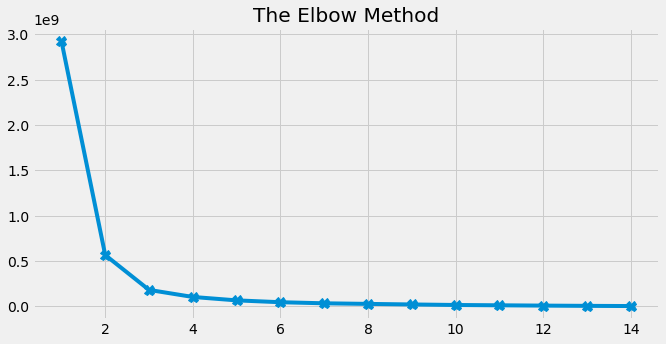

In [ ]:
inertia = []
for i in range(1,15):
    km = KMeans(n_clusters=i,max_iter=100,n_init=10,random_state=100).fit(new_data)
    inertia.append(km.inertia_)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
plt.title('The Elbow Method')
plt.plot(range(1,15),inertia,marker='X',markersize=10)

## **K-Mean Clustering & Visualization with T-SNE**
You can choose any parameters you want. You can find more information about it here : [K-Means Parameters Information](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [ ]:
km = KMeans(n_clusters=3,max_iter=100,n_init = 10,random_state=100)
pred = km.fit_predict(new_data)

In [ ]:
pred

array([0, 1, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       2, 0], dtype=int32)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cluster Distribution')

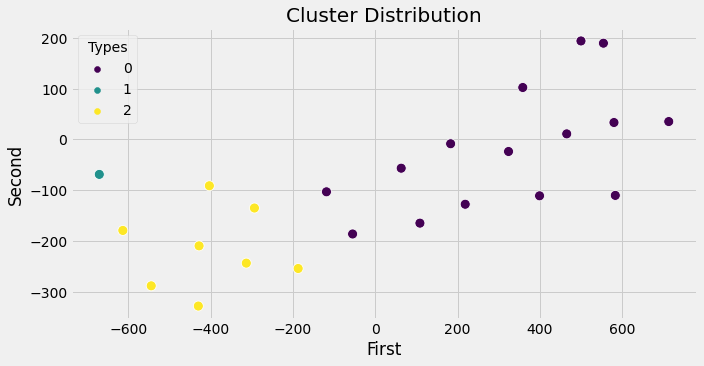

In [ ]:
# Let's Use t-sne for visualizing
from sklearn.manifold import TSNE


tsne =TSNE(n_components = 2,perplexity=10)  #The perplexity is related to the number of nearest neighbors. Larger datasets usually require a larger perplexity. 
                                            #Consider selecting a value between 5 and 50. Different values can result in significantly different results.
data_tsne = pd.DataFrame(tsne.fit_transform(new_data))
data_tsne = data_tsne.rename(columns= {0:'First',1:'Second'})
data_tsne['Types'] = pred

plt.figure(figsize=(10,5))
sns.scatterplot(data_tsne['First'],data_tsne['Second'],hue=data_tsne['Types'],palette='viridis',s=100).set_title("Cluster Distribution")

## **Investigating the Clusters**

#### **Cluster 0 with Visualization**

In [ ]:
new_data[pred==0]

type,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury)
neighbourhood,,,,,,,,,
Arbutus Ridge,325.0,1672.0,934.0,337.0,1852.0,160.0,498.0,3.0,285.0
Dunbar-Southlands,294.0,1847.0,1324.0,241.0,2899.0,240.0,629.0,3.0,269.0
Hastings-Sunrise,929.0,3199.0,2904.0,1379.0,5654.0,321.0,2452.0,18.0,1270.0
Kerrisdale,326.0,1826.0,1049.0,265.0,2805.0,179.0,547.0,7.0,443.0
Killarney,302.0,2130.0,1761.0,245.0,3990.0,163.0,1302.0,12.0,570.0
Marpole,1098.0,2527.0,1905.0,612.0,4151.0,232.0,1617.0,10.0,931.0
Musqueam,17.0,86.0,104.0,1.0,217.0,7.0,40.0,1.0,59.0
Oakridge,332.0,2089.0,889.0,1176.0,2290.0,172.0,669.0,6.0,414.0
Riley Park,848.0,2706.0,1795.0,410.0,4269.0,621.0,1197.0,4.0,671.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Total Cases In This Cluster are 132532


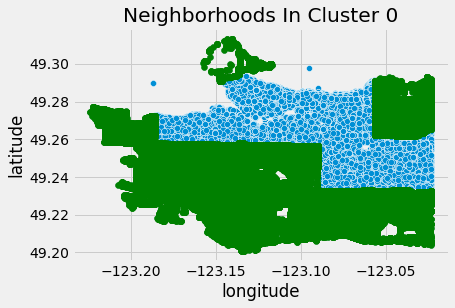

In [ ]:
# clusters : regional,safetiness, type of cases
cluster_0 = new_data[pred==0].index
sns.scatterplot(vancouver['longitude'],vancouver['latitude'])
plt.title('Neighborhoods In Cluster 0')
for i in cluster_0:
    d = data[data['neighbourhood']== i]   # Taking the neighborhood in Cluster 0
    plt.scatter(d['longitude'],d['latitude'],color='green')

cases = 0
for i in new_data[pred==0].values.flatten():
    cases = cases + int(i)
print('Total Cases In This Cluster are {}'.format(cases))

#### **Cluster 1 with Visualization**

In [ ]:
new_data[pred==1]

type,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury)
neighbourhood,,,,,,,,,
Central Business District,9371.0,3505.0,16672.0,19244.0,48003.0,6907.0,4016.0,41.0,3188.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Total Cases In This Cluster are 110947


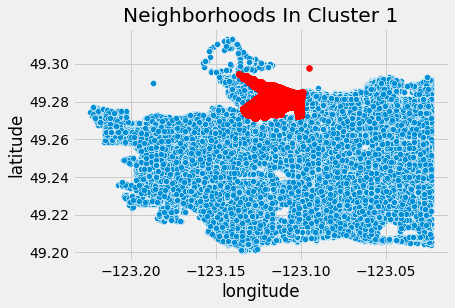

In [ ]:
cluster_1 = new_data[pred==1].index
sns.scatterplot(vancouver['longitude'],vancouver['latitude'])
plt.title('Neighborhoods In Cluster 1')
for i in cluster_1:
    d = data[data['neighbourhood']== i]
    plt.scatter(d['longitude'],d['latitude'],color='red')
cases = 0
for i in new_data[pred==1].values.flatten():
    cases = cases + int(i)
print('Total Cases In This Cluster are {}'.format(cases))

#### **Cluster 2 with Visualization**

In [ ]:
new_data[pred==2]

type,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury)
neighbourhood,,,,,,,,,
Fairview,3303.0,3834.0,3196.0,3269.0,11934.0,3394.0,2037.0,14.0,1180.0
Grandview-Woodland,2082.0,4515.0,4970.0,2508.0,7342.0,1403.0,3111.0,9.0,1240.0
Kensington-Cedar Cottage,1277.0,4136.0,3760.0,2961.0,7474.0,859.0,2919.0,11.0,1544.0
Kitsilano,2092.0,4390.0,3692.0,1730.0,8912.0,2464.0,2366.0,13.0,1040.0
Mount Pleasant,2769.0,3278.0,4070.0,3698.0,9679.0,2746.0,2654.0,18.0,1624.0
Renfrew-Collingwood,1197.0,4296.0,3886.0,4119.0,8420.0,419.0,3011.0,12.0,1401.0
Strathcona,2168.0,2019.0,4556.0,994.0,7343.0,1015.0,1650.0,20.0,1154.0
West End,2775.0,3480.0,5325.0,6033.0,16904.0,2985.0,2660.0,6.0,1184.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Total Cases In This Cluster are 230549


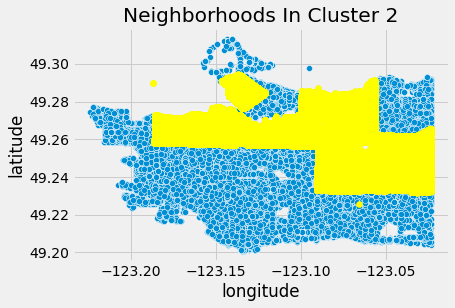

In [ ]:
cluster_2 = new_data[pred==2].index
sns.scatterplot(vancouver['longitude'],vancouver['latitude'])
plt.title('Neighborhoods In Cluster 2')
for i in cluster_2:
    d = data[data['neighbourhood']== i]
    plt.scatter(d['longitude'],d['latitude'],color='yellow')

cases = 0
for i in new_data[pred==2].values.flatten():
    cases = cases + int(i)
print('Total Cases In This Cluster are {}'.format(cases))

# <font color=blue>**Try It Yourself!**

**Now Open Your Jupyter Notebook/Your Favorite IDE to Try it Yourself!**

## **Dataset**
Feel free to use a dataset of your own, look online, or use any of the following datasets (download them below): 

*Click the 'Download' Button in the website to download the dataset*

Wine dataset : https://www.kaggle.com/harrywang/wine-dataset-for-clustering

Credit card dataset : https://www.kaggle.com/aryashah2k/credit-card-customer-data

## **Try to clean the dataset if necessary & Choose the Best # of K with the Elbow Method**

In [ ]:
# Your code


## **Build your own K-Mean Clustering Model**

In [ ]:
# Your code


## **Visualize the Dataset Using PCA or t-SNE Methods**
You can use t-SNE method or [PCA(Principal component analysis) ](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) for dimensionality reduction!

In [ ]:
# Your code


## **Investigate the Clusters**

In [ ]:
 # Your code
 

# **Anyone Would Like To Show Your Work?**